In [5]:
from Levenshtein import distance
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

def evaluate(file: Path) -> None:
    df = pd.read_json(file, orient="records", lines=True)

    # Initialize a new column 'levenshtein_distance' in the DataFrame
    df['ED_error'] = df.apply(
        lambda row: distance(row['sentence'], row['error']),
        axis=1
    )

    # Initialize a new column 'levenshtein_distance' in the DataFrame
    df['ED_corrected'] = df.apply(
        lambda row: distance(row['sentence'], row['correction']),
        axis=1
    )

    print(f"Average ED original v error: {df['ED_error'].mean()}")
    print(f"Average ED error v corrected: {df['ED_corrected'].mean()}")

    df["sentence_lenth"] = df["sentence"].str.len()

    # Plot the results
    # text length on x axis and levenshtein distance on y axis
    plt.figure(figsize=(10, 6))
    plt.scatter(df['sentence_lenth'], df['ED_corrected'], alpha=0.5, label="correct")
    plt.scatter(df['sentence_lenth'], df['ED_error'], alpha=0.5, label="error")
    plt.title(f'Levenshtein Distance between original and error texts in {file.name}')
    plt.xlabel('sentence length')
    plt.ylabel('ED error')
    plt.grid(True)
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.scatter(df['ED_error'], df['ED_corrected'], alpha=0.5)
    plt.title(f'Levenshtein Distance between original and corrected texts in {file.name}')
    plt.xlabel('ED error')
    plt.ylabel('ED corrected')
    plt.grid(True)
    plt.show()

DATASET = Path("./evaluation-test.json")

Average ED original v error: 2.529
Average ED error v corrected: 3.812


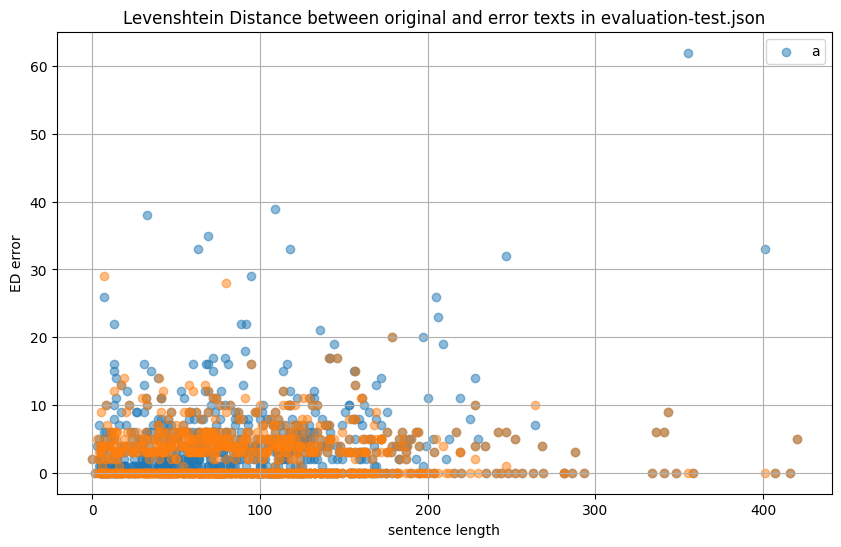

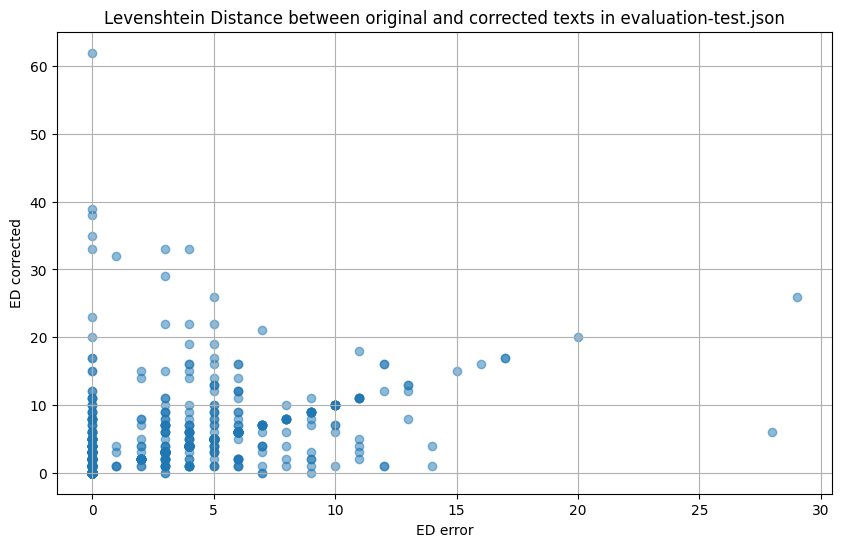

In [6]:
evaluate(DATASET)